In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
movies_df = pd.read_csv('MovieLens/movie.csv')
genome_tags_df = pd.read_csv('MovieLens/genome_tags.csv')
genome_scores_df = pd.read_csv('MovieLens/genome_scores.csv')

In [5]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Tổng số phim: 27278
Tổng số thể loại: 20
Số lượng mỗi thể loại:
genres
Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
Name: count, dtype: int64


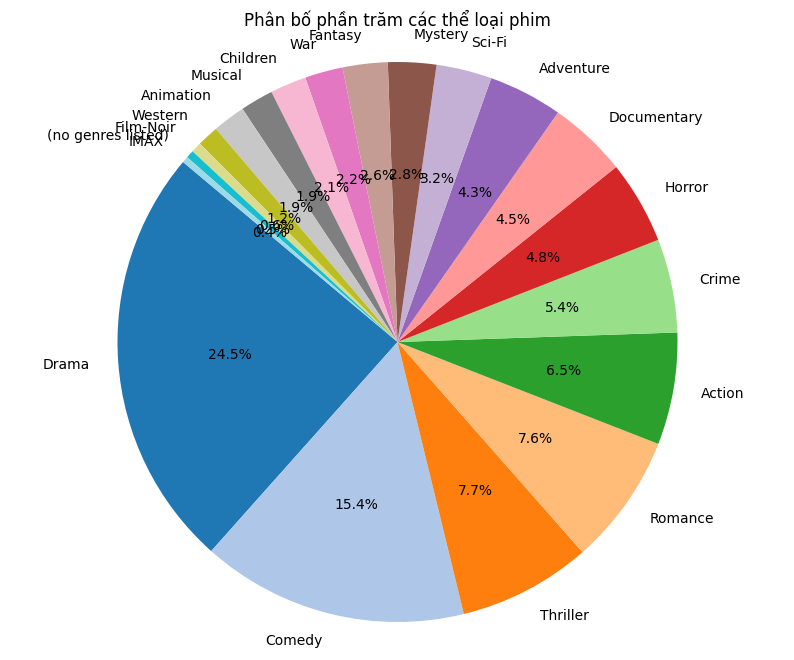

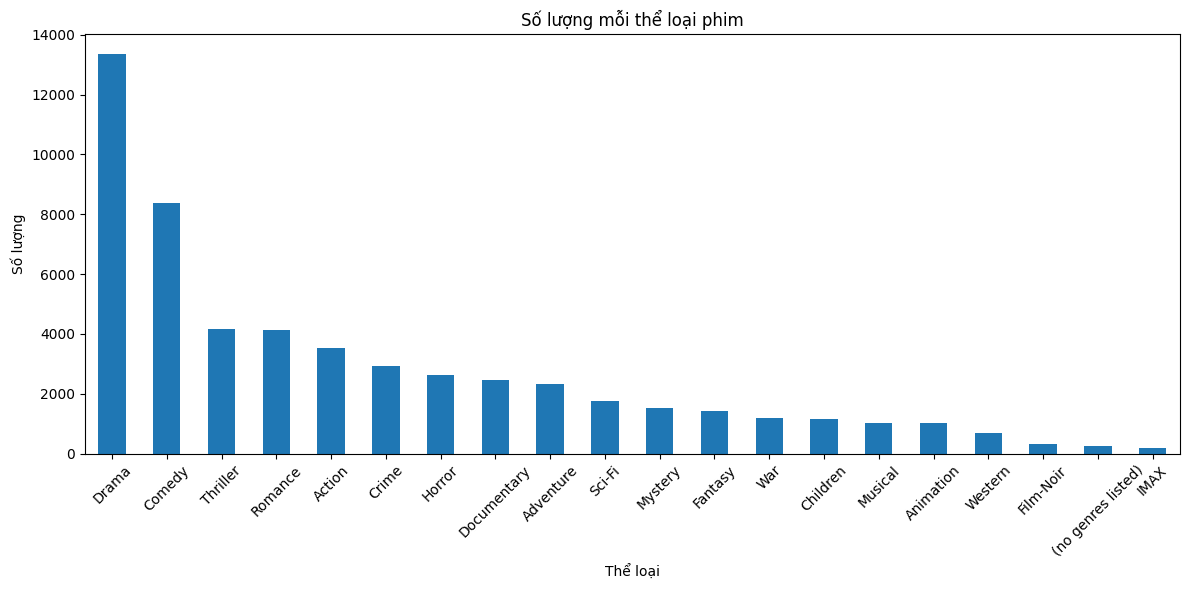

ValueError: Image size of 9489x4950480 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

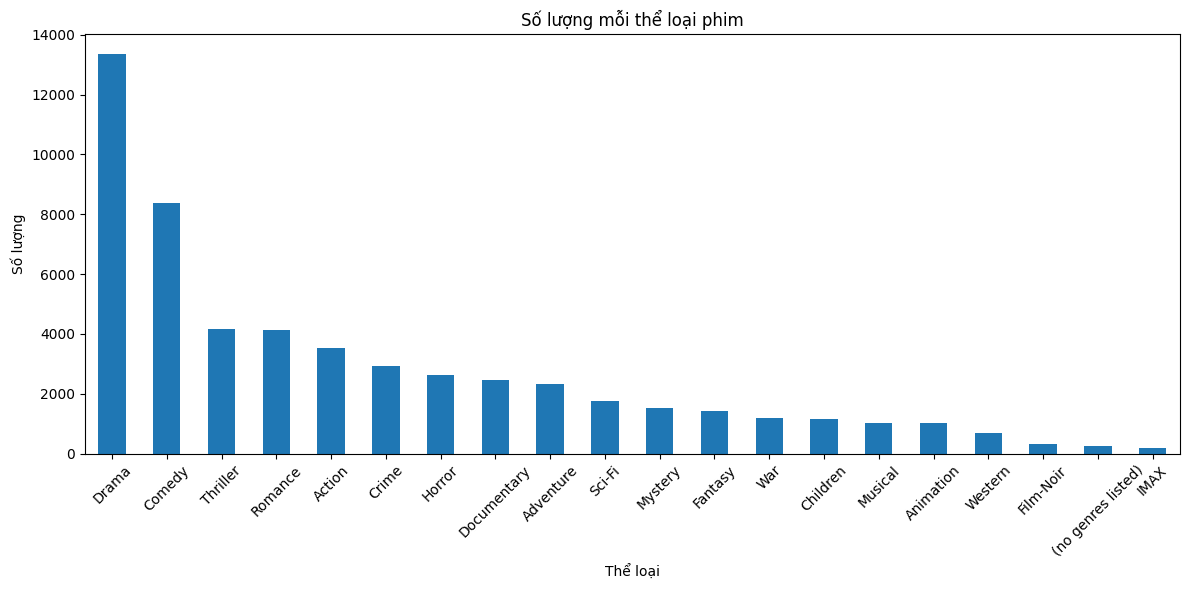

In [ ]:
data = pd.read_csv('MovieLens/movie.csv')

total_movies = data.shape[0]
print(f'Tổng số phim: {total_movies}')

genres_series = data['genres'].str.split('|').explode()

unique_genres = genres_series.unique()
num_genres = len(unique_genres)
print(f'Tổng số thể loại: {num_genres}')

genres_count = genres_series.value_counts()
print("Số lượng mỗi thể loại:")
print(genres_count)

plt.figure(figsize=(10, 8))
plt.pie(genres_count, labels=genres_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Phân bố phần trăm các thể loại phim')
plt.axis('equal')  # Đảm bảo biểu đồ là hình tròn
plt.show()
plt.figure(figsize=(12, 6))
genres_count.plot(kind='bar')
plt.title('Số lượng mỗi thể loại phim')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

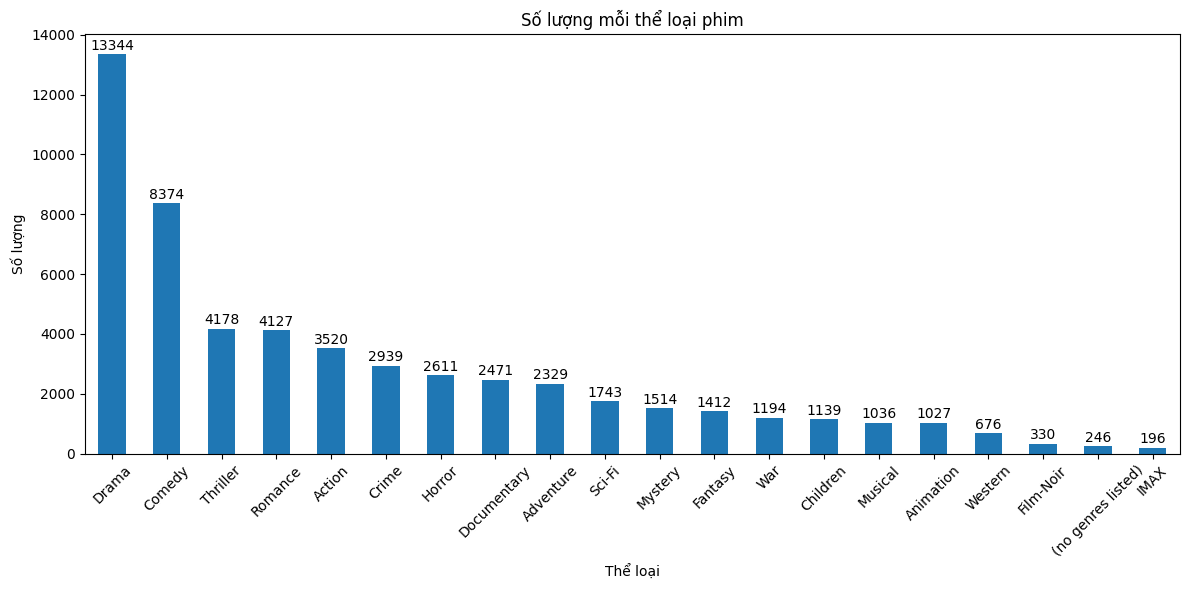

In [13]:
plt.figure(figsize=(12, 6))  # Cấu hình kích thước trước

for i, count in enumerate(genres_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

genres_count.plot(kind='bar')  # Vẽ biểu đồ cột
plt.title('Số lượng mỗi thể loại phim')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)  # Xoay nhãn trục x
plt.tight_layout()  # Tự động căn chỉnh bố cục
plt.show()


In [6]:
genome_tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


Tổng số thẻ (tagId): 1128
Danh sách các thẻ và số lần xuất hiện:
tag
007                                    1
oscar (best directing)                 1
oscar (best picture)                   1
oscar (best music - original song)     1
oscar (best music - original score)    1
                                      ..
father daughter relationship           1
father son relationship                1
father-son relationship                1
fbi                                    1
zombies                                1
Name: count, Length: 1128, dtype: int64


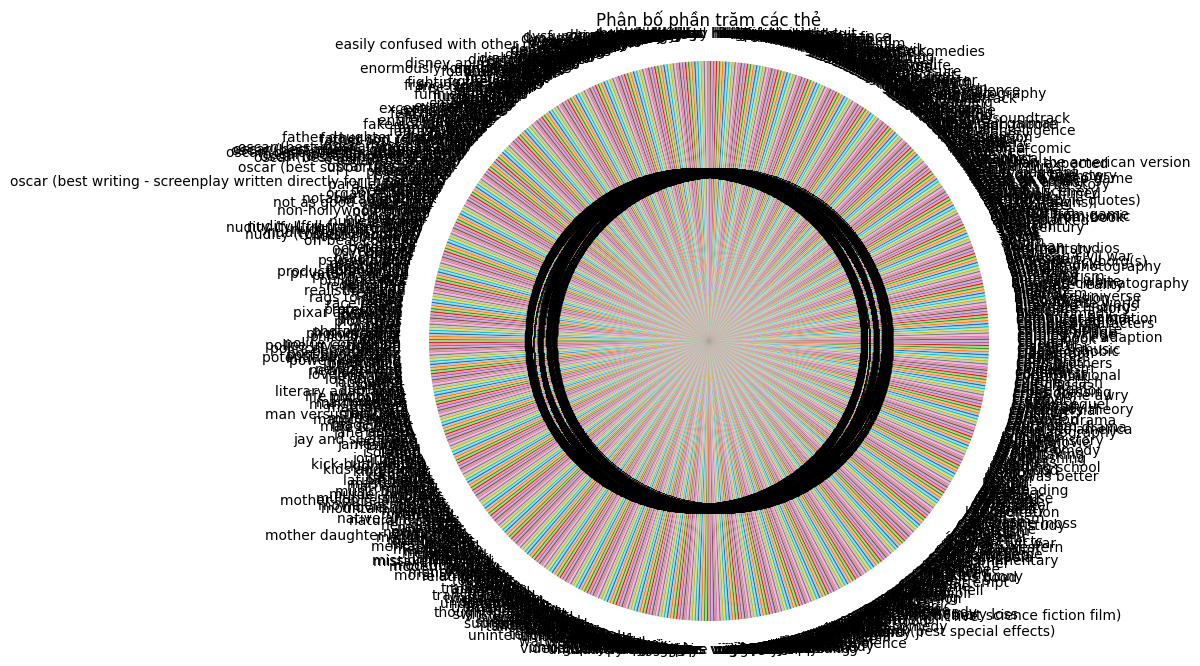

In [9]:
# Đếm tổng số thẻ (tagId)
total_tags = genome_tags_df['tagId'].nunique()
print(f'Tổng số thẻ (tagId): {total_tags}')

# Đếm số lần xuất hiện của mỗi thẻ (nếu có dữ liệu liên quan đến tần suất)
tag_counts = genome_tags_df['tag'].value_counts()
print("Danh sách các thẻ và số lần xuất hiện:")
print(tag_counts)

# Biểu đồ tròn (nếu muốn trực quan hóa số lượng từng thẻ)
plt.figure(figsize=(10, 8))
plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Phân bố phần trăm các thẻ')
plt.axis('equal')  # Đảm bảo biểu đồ là hình tròn
plt.show()

In [7]:
genome_scores_df.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


## VISUALIZATION

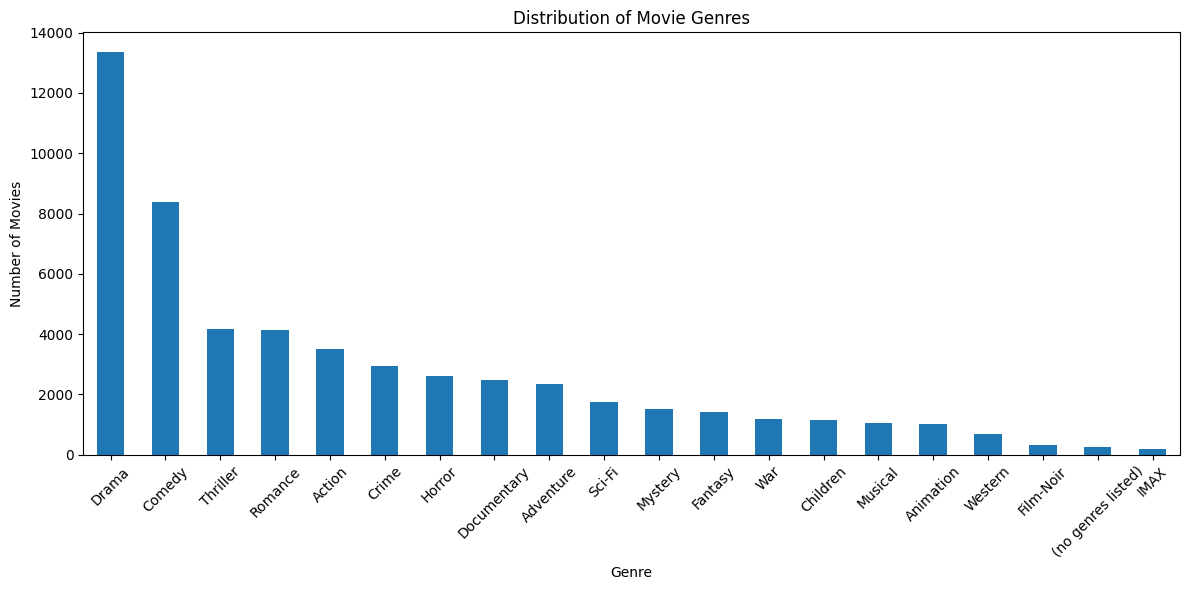

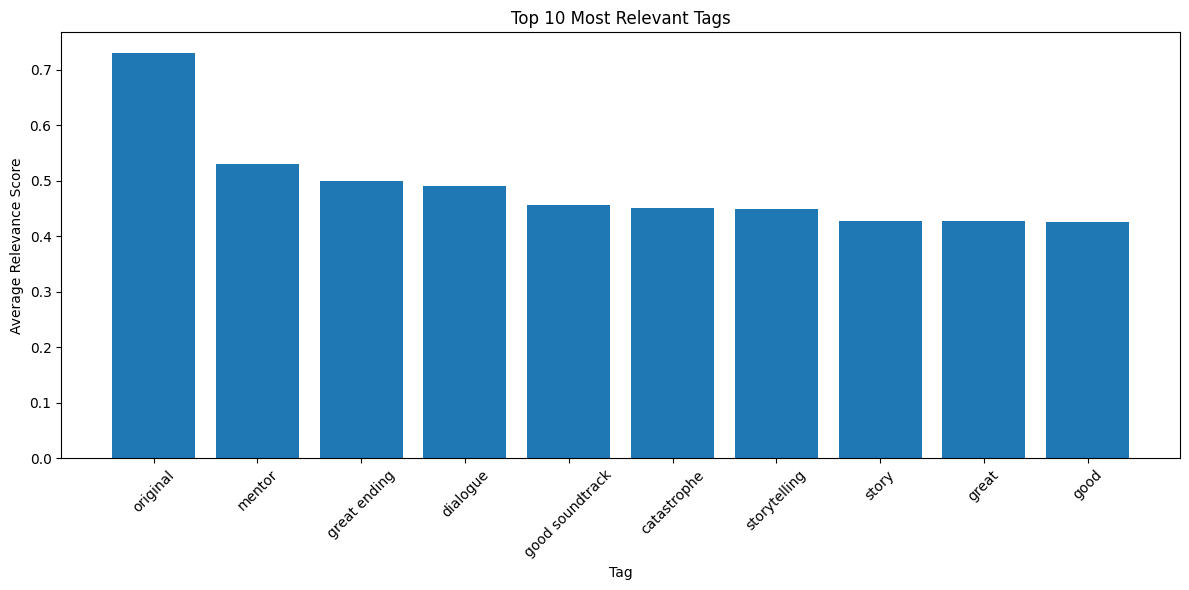

ValueError: cannot convert float NaN to integer

In [5]:
# Visualization 1: Distribution of movie genres
movies_df['genres'] = movies_df['genres'].str.split('|')
all_genres = movies_df.explode('genres')['genres'].value_counts()

plt.figure(figsize=(12, 6))
all_genres.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Top 10 most relevant tags
top_tags = genome_scores_df.groupby('tagId')['relevance'].mean().sort_values(ascending=False).head(10)
top_tags = top_tags.reset_index()
top_tags = top_tags.merge(genome_tags_df, on='tagId')

plt.figure(figsize=(12, 6))
plt.bar(top_tags['tag'], top_tags['relevance'])
plt.title('Top 10 Most Relevant Tags')
plt.xlabel('Tag')
plt.ylabel('Average Relevance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Movies released by year
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)').dropna()
movies_df['year'] = movies_df['year'].astype(int)
movies_by_year = movies_df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(movies_by_year.index, movies_by_year.values, marker='o', linestyle='-')
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid()
plt.tight_layout()
plt.show()

## PREPROCESSING

In [14]:
merged_genome = genome_scores_df.merge(genome_tags_df, on='tagId', how='left')

In [15]:
merged_genome.head()

,movieId,tagId,relevance,tag
0,1,1,0.02500,007
1,1,2,0.02500,007 (series)
2,1,3,0.05775,18th century
3,1,4,0.09675,1920s
4,1,5,0.14675,1930s


In [10]:
top_tags = merged_genome[merged_genome['relevance'] > 0.5]

In [11]:
top_tags.reset_index(drop=True, inplace=True)

In [12]:
top_tags.head()

,movieId,tagId,relevance,tag
0,1,11,0.57700,3d
1,1,19,0.67050,action
2,1,29,0.89200,adventure
3,1,30,0.67625,affectionate
4,1,61,0.54475,animal movie


In [13]:
top_tags['tag'].where(top_tags['movieId'] == 1).dropna()

0               3d
1           action
2        adventure
3     affectionate
4     animal movie
          ...     
77      very funny
78       very good
79          visual
80       whimsical
81           witty
Name: tag, Length: 82, dtype: object

In [14]:
list(top_tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)))[1]

'action adapted from:book adventure animal movie animals based on a book based on a video game based on book big budget chase childhood children comedy computer animation computer game destiny dynamic cgi action effects entertaining exciting family fantasy fantasy world fun fun movie good good action great great movie happy ending jungle kids kids and family lions magic mentor monkey nostalgic original pg-13 predictable runaway saturn award (best special effects) scary special effects spiders story supernatural video game video games videogame'

In [15]:
grouped_tags = top_tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()

In [16]:
grouped_tags.head()

,movieId,tag
0,1,3d action adventure affectionate animal movie ...
1,2,action adapted from:book adventure animal movi...
2,3,chase comedy crappy sequel destiny family fish...
3,4,adultery betrayal chick flick divorce feel goo...
4,5,catastrophe chase comedy crappy sequel culture...


In [17]:
print(movies_df['movieId'].nunique())
movies_df.head()

27278


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
print(grouped_tags['movieId'].size)
print(movies_df['movieId'].size)
print("Uniques in movies_df : ", movies_df['movieId'].nunique())

10381
27278
Uniques in movies_df :  27278


In [19]:
print(movies_df.merge(grouped_tags, on='movieId', how='inner').shape)
final_df = movies_df.merge(grouped_tags, on='movieId', how='inner')

(10381, 4)


In [20]:
final_df = final_df[['movieId', 'title', 'genres', 'tag']]

In [21]:
final_df.sample(3)

,movieId,title,genres,tag
2595,2926,Hairspray (1988),Comedy|Drama,cult classic dance dancing fantasy world good ...
9477,91485,"Expendables 2, The (2012)",Action|Adventure,action action packed arms dealer arnold bad ac...
5970,7089,Amarcord (1973),Comedy|Drama,1930s absurd adolescence affectionate art hous...


In [16]:
def add_genres_to_tag(row):
    if pd.isnull(row['tag']):
        return row['genres'].replace("|", " ")     # If we took the "how = 'left' or 'right' ", this condition was supposed to meet
    else:
        return row['tag'] + " " + row['genres'].replace("|", " ")

In [17]:
final_df['tag'] = final_df.apply(lambda row: add_genres_to_tag(row), axis=1)

NameError: name 'final_df' is not defined

In [24]:
final_df['tag'][0]

'3d action adventure affectionate animal movie animals animated animation based on book cartoon cgi chase childhood children classic clever colourful comedy computer animation cool creativity cute cute! destiny dialogue disney disney animated feature entertaining excellent excellent script fairy tale family fantasy feel good movie feel-good friendship fun fun movie funny good good soundtrack great great ending great movie heartwarming highly quotable humor humorous imagination imdb top 250 interesting kids kids and family light mentor monsters nostalgic original original plot oscar (best animated feature) oscar (best directing) oscar winner pixar pixar animation quotable runaway sentimental simple story storytelling sweet talking animals talky technology touching toys unlikely friendships very funny very good visual whimsical witty Adventure Animation Children Comedy Fantasy'

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
cvec = CountVectorizer(stop_words = 'english')
cvec.fit_transform(final_df['tag'])

<10381x1127 sparse matrix of type '<class 'numpy.int64'>'
	with 536566 stored elements in Compressed Sparse Row format>

In [27]:
bow = cvec.fit_transform(final_df['tag'])

In [28]:
titles = movies_df['title'].tolist()[:final_df.shape[0]]


In [29]:
bow_df = pd.DataFrame(bow.toarray(), index= titles).fillna(0)


In [30]:
bow_df.shape


(10381, 1127)

TF-IDF

In [31]:
tfvec = TfidfVectorizer(stop_words='english')
tfidf = tfvec.fit_transform(final_df['tag'])

In [32]:
tfidf_df = pd.DataFrame(tfidf.toarray(), index= titles).fillna(0)


In [33]:
tfidf_df.head(4)


,0,1,2,3,4,5,6,7,8,9,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126
Toy Story (1995),0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jumanji (1995),0.0,0.0,0.0,0.060413,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.0,0.0,0.0,0.142245,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Waiting to Exhale (1995),0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

SimilarityMatrix for Bag-of-words

In [35]:
similarityMatrix = cosine_similarity(bow_df)

In [36]:
bow_similarity_df = pd.DataFrame(similarityMatrix, index=bow_df.index, columns=bow_df.index)


In [37]:
bow_similarity_df.head()

,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,"Holy Girl, The (Niña santa, La) (2004)",They Came Back (Les Revenants) (2004),"Baxter, The (2005)","Cave, The (2005)",Undiscovered (2005),Dirty Deeds (2005),"Constant Gardener, The (2005)",Transporter 2 (2005),Margaret Cho: Assassin (2005),Just Like Heaven (2005)
Toy Story (1995),1.000000,0.501916,0.286937,0.361311,0.482144,0.360662,0.351708,0.339123,0.130235,0.280625,...,0.490566,0.324484,0.173749,0.298983,0.582984,0.143468,0.147266,0.231814,0.242821,0.215852
Jumanji (1995),0.501916,1.000000,0.231302,0.177484,0.282091,0.220614,0.294419,0.525382,0.411857,0.385175,...,0.273772,0.408047,0.402673,0.393417,0.371513,0.231302,0.115744,0.121464,0.150999,0.195750
Grumpier Old Men (1995),0.286937,0.231302,1.000000,0.257564,0.571602,0.193582,0.411435,0.107443,0.101567,0.211460,...,0.167380,0.361873,0.110096,0.200595,0.179713,0.121212,0.205294,0.156682,0.105507,0.174078
Waiting to Exhale (1995),0.361311,0.177484,0.257564,1.000000,0.446748,0.162506,0.626013,0.228306,0.071940,0.145239,...,0.248401,0.186411,0.138633,0.147344,0.132005,0.085855,0.282007,0.147971,0.132854,0.140913
Father of the Bride Part II (1995),0.482144,0.282091,0.571602,0.446748,1.000000,0.216852,0.431158,0.122300,0.165160,0.225070,...,0.357719,0.256776,0.155158,0.260952,0.246774,0.118262,0.121393,0.318478,0.102940,0.153666


SimilarityMatrix for tfidf

In [38]:
tf_similarityMatrix = cosine_similarity(tfidf_df)

In [39]:
tfidf_similarity_df = pd.DataFrame(tf_similarityMatrix, index=tfidf_df.index, columns=tfidf_df.index)

In [40]:
tfidf_similarity_df.head(4)

,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,"Holy Girl, The (Niña santa, La) (2004)",They Came Back (Les Revenants) (2004),"Baxter, The (2005)","Cave, The (2005)",Undiscovered (2005),Dirty Deeds (2005),"Constant Gardener, The (2005)",Transporter 2 (2005),Margaret Cho: Assassin (2005),Just Like Heaven (2005)
Toy Story (1995),1.000000,0.313109,0.091063,0.186775,0.228712,0.171150,0.147453,0.281120,0.042320,0.107731,...,0.419293,0.178195,0.081054,0.126642,0.553042,0.046432,0.056817,0.101476,0.091150,0.076849
Jumanji (1995),0.313109,1.000000,0.085853,0.046291,0.089519,0.088447,0.144406,0.384254,0.412643,0.186401,...,0.169490,0.269848,0.235358,0.215703,0.256541,0.105699,0.059105,0.037636,0.052279,0.079311
Grumpier Old Men (1995),0.091063,0.085853,1.000000,0.097508,0.478048,0.054634,0.177849,0.063650,0.026430,0.067914,...,0.067877,0.177384,0.086980,0.073494,0.069112,0.024350,0.090823,0.069261,0.037332,0.061598
Waiting to Exhale (1995),0.186775,0.046291,0.097508,1.000000,0.248750,0.057519,0.515725,0.173805,0.011429,0.039572,...,0.118037,0.058440,0.089679,0.035069,0.069241,0.015311,0.200435,0.062148,0.055255,0.071796


Recommendations

In [41]:
def recommend_bow(movie):
    movie_index = bow_similarity_df.index.get_loc(movie)
    top_10 = bow_similarity_df.iloc[movie_index].sort_values(ascending=False)[1:11]
    print(f'Top 10 similar movies to {movie}:')
    print(top_10)

In [42]:
recommend_bow('Toy Story (1995)')

Top 10 similar movies to Toy Story (1995):
Kiss Me Deadly (1955)                                                                                                                     0.902212
Nightmares (1983)                                                                                                                         0.880992
House (1986)                                                                                                                              0.852370
Flash Gordon Conquers the Universe (1940)                                                                                                 0.839851
Goya in Bordeaux (Goya en Burdeos) (1999)                                                                                                 0.827997
Cyborg 2: Glass Shadow (1993)                                                                                                             0.812411
Nightmare City (a.k.a. City of the Walking Dead) (a.k.a. Invasión de los zo

In [43]:
def recommend_tfidf(movie):
    movie_index = tfidf_similarity_df.index.get_loc(movie)
    top_10 = tfidf_similarity_df.iloc[movie_index].sort_values(ascending=False)[1:11]
    print(f'Top 10 similar movies to {movie}:')
    print(top_10)

In [44]:
recommend_tfidf('Toy Story (1995)')

Top 10 similar movies to Toy Story (1995):
Kiss Me Deadly (1955)                                                                                                                     0.868909
House (1986)                                                                                                                              0.844484
Nightmares (1983)                                                                                                                         0.833144
Flash Gordon Conquers the Universe (1940)                                                                                                 0.810667
Basket Case (1982)                                                                                                                        0.777523
Cyborg 2: Glass Shadow (1993)                                                                                                             0.734882
Machine Gun Kelly (1958)                                                   